<h1>Entrega 5</h1>
<p><b>Autores: Saúl Fernández Rodríguez, Cristian Sousa Vidal, Jacobo Rivas Lago, Alejandro Esperón Couceiro
</b></p>

<p>Siguiendo el ejercicio para clasificar las campañas de marketing directo del banco.</p>
<ol>
    <li><p>Crea un subconjunto del dataset de training (60%) validation (20%) y test (20%)</p></li>
    <li><p>Hiperparametriza los valores del algoritmo Random Forest: <b>'n_estimator: </b>(100, 300, 500, 800, 1200). Mira cuál es el mejor parámetro (con el validation set)  y luego evalúalo con el test set</p>
    <li><p>Haz lo mismo con los algoritmos de Naive Bayes y SVC (hiperparametrización y test) </p></li>
    <li><p>¿Cuál ha ofrecido mejor rendimiento? ¿Qué conclusiones has podido obtener? </p></li>
</ol>


In [2]:
from pathlib import Path
import csv

path = Path.cwd()

In [3]:
bank_dict = {}
number_rows=0
with open (f"{str(path)}/bank_data.csv" , 'r', encoding="UTF8") as csv_file:
    rows = csv.reader(csv_file, delimiter=";")

    for i, row in enumerate(rows):

        if i != 0:
            bank_dict[i] = {
                "age": int(row[0]),
                "job": row[1],
                "marital": row[2],
                "education": row[3],
                "default": row[4],
                "housing": row[5],
                "loan": row[6],
                "contact": row[7],
                "month": row[8],
                "day_of_week": row[9],
                "duration": row[10],
                "campaign": row[11],
                "pdays": row[12],
                "previous": row[13],
                "poutcome": row[14],
                "y": row[20],
            }
            number_rows += 1
        else:
            headers = row

In [4]:
jobs = []
marital = []
education = []
default = []
housing = []
loan = []
contact = []
month = []
day_of_week = []
poutcome = []

for i, id in enumerate(bank_dict):
    jobs.append(bank_dict[id]["job"])
    marital.append(bank_dict[id]["marital"])
    education.append(bank_dict[id]["education"])
    default.append(bank_dict[id]["default"])
    housing.append(bank_dict[id]["housing"])
    loan.append(bank_dict[id]["loan"])
    contact.append(bank_dict[id]["contact"])
    month.append(bank_dict[id]["month"])
    day_of_week.append(bank_dict[id]["day_of_week"])
    month.append(bank_dict[id]["month"])
    poutcome.append(bank_dict[id]["poutcome"])


In [5]:
job_dict = {}
for j, job in enumerate(set(jobs)):
    job_dict[job] = j

marital_dict = {}
for j, mar in enumerate(set(marital)):
    marital_dict[mar] = j

education_dict = {}
for j, edu in enumerate(set(education)):
    education_dict[edu] = j

unkown_yes_no_dict = {}
unkown_yes_no_dict["yes"] = 1
unkown_yes_no_dict["no"] = 0
unkown_yes_no_dict["unknown"] = 3

cellular_telephone = {}
cellular_telephone["cellular"] = 0
cellular_telephone["telephone"] = 1

months = {}
months["jan"] = 1
months["feb"] = 2
months["mar"] = 3
months["apr"] = 4
months["may"] = 5
months["jun"] = 6
months["jul"] = 7
months["aug"] = 8
months["sep"] = 9
months["oct"] = 10
months["nov"] = 11
months["dec"] = 12

days_dict = {}
days_dict["mon"] = 1
days_dict["tue"] = 2
days_dict["wed"] = 3
days_dict["thu"] = 4
days_dict["fri"] = 5

success_filure_nonexist = {}
success_filure_nonexist["success"] = 1
success_filure_nonexist["failure"] = 0
success_filure_nonexist["nonexistent"] = 2

In [6]:
import pickle

preprocess_bank_dict = {}
route_export = f"{str(path)}/dataset_dict.pkl"

for i, id in enumerate(bank_dict):
    preprocess_bank_dict[id] = {}
    preprocess_bank_dict[id] = {
        'age': bank_dict[id]["age"],
        'job': job_dict[bank_dict[id]["job"]],
        'marital': marital_dict[bank_dict[id]["marital"]],
        'education': education_dict[bank_dict[id]["education"]],
        'default': unkown_yes_no_dict[bank_dict[id]["default"]],
        'housing': unkown_yes_no_dict[bank_dict[id]["housing"]],
        'loan': unkown_yes_no_dict[bank_dict[id]["loan"]],
        'contact': cellular_telephone[bank_dict[id]["contact"]],
        'month': months[bank_dict[id]["month"]],
        'day_of_week': days_dict[bank_dict[id]["day_of_week"]],
        'duration': bank_dict[id]["duration"],
        'campaign':  bank_dict[id]["campaign"],
        'pdays': bank_dict[id]["pdays"],
        'previous': bank_dict[id]["previous"],
        'poutcome': success_filure_nonexist[bank_dict[id]["poutcome"]],
        'y': bank_dict[id]["y"]
    }


for i, id in enumerate(preprocess_bank_dict):
    print(preprocess_bank_dict[id])
    print("---"*20)
    if i == 5:
        break

pickle.dump(preprocess_bank_dict, open(route_export, 'wb'))


{'age': 28, 'job': 11, 'marital': 0, 'education': 3, 'default': 0, 'housing': 1, 'loan': 0, 'contact': 0, 'month': 6, 'day_of_week': 4, 'duration': '339', 'campaign': '3', 'pdays': '6', 'previous': '2', 'poutcome': 1, 'y': '1'}
------------------------------------------------------------
{'age': 55, 'job': 3, 'marital': 2, 'education': 7, 'default': 0, 'housing': 1, 'loan': 0, 'contact': 0, 'month': 8, 'day_of_week': 5, 'duration': '137', 'campaign': '1', 'pdays': '3', 'previous': '1', 'poutcome': 1, 'y': '1'}
------------------------------------------------------------
{'age': 36, 'job': 6, 'marital': 2, 'education': 3, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 0, 'month': 6, 'day_of_week': 1, 'duration': '174', 'campaign': '1', 'pdays': '3', 'previous': '1', 'poutcome': 1, 'y': '1'}
------------------------------------------------------------
{'age': 55, 'job': 11, 'marital': 2, 'education': 3, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 0, 'month': 8, 'day_of_week': 1,

Métricas

In [7]:
from sklearn import metrics

def metricas(y_test, y_pred):
    print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
    print("Precision: ",metrics.precision_score(y_test,y_pred))
    print("Recall: ",metrics.recall_score(y_test,y_pred))
    print("F1-Score: ",metrics.f1_score(y_test,y_pred))

Matriz de confusión

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def matriz_confusion(y_test, y_pred):
    predictions = y_pred
    cnf_matrix=confusion_matrix(y_test,predictions)
    lfg, ax = plt.subplots(1)
    ax =sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens,annot=True)
    plt.title('Confusion matrix')
    plt.ylabel('True category')
    plt.xlabel('Predicted category')
    plt.show()

    print(classification_report(y_test,predictions))

Subconjunto del dataset de training (60%) validation (20%) y test (20%)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import csv

route_export = f"{str(path)}/dataset_dict.pkl"
dataset_dict = pickle.load(open(route_export, "rb"))

x=[id for id in dataset_dict]
y=[int(dataset_dict[id]["y"]) for id in dataset_dict]

print(x[:10])
print(y[:10])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
train_array=[]

for i,id in enumerate(X_train):
    train_array.append([int(dataset_dict[id]['age']),
                       int(dataset_dict[id]['job']),
                        int(dataset_dict[id]['marital']),
                        int(dataset_dict[id]['education']),
                        int(dataset_dict[id]['default']),
                        int(dataset_dict[id]['housing']),
                        int(dataset_dict[id]['loan']),
                        int(dataset_dict[id]['contact']),
                        int(dataset_dict[id]['month']),
                        int(dataset_dict[id]['day_of_week']),
                        int(dataset_dict[id]['duration']),
                        int(dataset_dict[id]['campaign']),
                        int(dataset_dict[id]['pdays']),
                        int(dataset_dict[id]['previous']),
                        int(dataset_dict[id]['poutcome'])
                       ])


x_np = np.asarray(train_array)
y_np = np.asarray(y_train)

random_forest = RandomForestClassifier(max_depth=100, random_state=42,n_estimators=500)
random_forest.fit(x_np,y_np)

pickle.dump(random_forest, open(f"{str(path)}/model.pkl",'wb'))

In [11]:
random_forest = pickle.load(open(f"{str(path)}/model.pkl",'rb'))

test_array=[]
for i,id in enumerate(X_test):
    test_array.append([int(dataset_dict[id]['age']),
                       int(dataset_dict[id]['job']),
                        int(dataset_dict[id]['marital']),
                        int(dataset_dict[id]['education']),
                        int(dataset_dict[id]['default']),
                        int(dataset_dict[id]['housing']),
                        int(dataset_dict[id]['loan']),
                        int(dataset_dict[id]['contact']),
                        int(dataset_dict[id]['month']),
                        int(dataset_dict[id]['day_of_week']),
                        int(dataset_dict[id]['duration']),
                        int(dataset_dict[id]['campaign']),
                        int(dataset_dict[id]['pdays']),
                        int(dataset_dict[id]['previous']),
                        int(dataset_dict[id]['poutcome'])
                       ])

x_test_np = np.asarray(test_array)
y_test_np = np.asarray(y_test)

y_pred = random_forest.predict(x_test_np)
metricas(y_test, y_pred)

Accuracy:  0.8347978910369068
Precision:  0.8036093418259024
Recall:  0.7985232067510548
F1-Score:  0.801058201058201


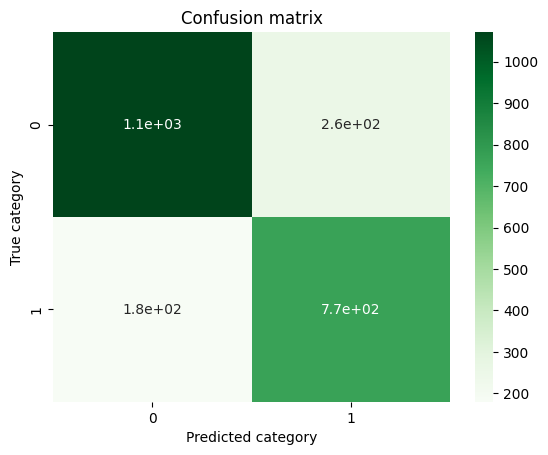

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1328
           1       0.75      0.81      0.78       948

    accuracy                           0.81      2276
   macro avg       0.80      0.81      0.80      2276
weighted avg       0.81      0.81      0.81      2276



In [25]:
matriz_confusion(y_test, y_pred)

Naive Bayes

In [31]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid_gnb = {'priors': [None, [0.1, 0.9],[0.2, 0.8], [0.3, 0.7],[0.4,0.6],[0.5,0.5]], 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,  1e-4, 1e-3, 1e-2, 1e-1]}
# Crear y entrenar el modelo de Gaussian Naive Bayes
gnb = GaussianNB()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5)
grid_search_gnb.fit(x_np, y_np).predict(x_test_np)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros para Gaussian Naive Bayes:", grid_search_gnb.best_params_)

# Obtener el mejor modelo
best_gnb_model = grid_search_gnb.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_gnb_model.predict(x_test_np)

# Evaluar el rendimiento del mejor modelo
print("Número de puntos mal clasificados de un total de %d puntos: %d" % (x_test_np.shape[0], (y_test != y_pred).sum()))

metricas(y_test, y_pred)

Mejores hiperparámetros para Gaussian Naive Bayes: {'priors': [0.2, 0.8], 'var_smoothing': 0.0001}
Número de puntos mal clasificados de un total de 2276 puntos: 444
Accuracy:  0.804920913884007
Precision:  0.7837837837837838
Recall:  0.7341772151898734
F1-Score:  0.7581699346405228


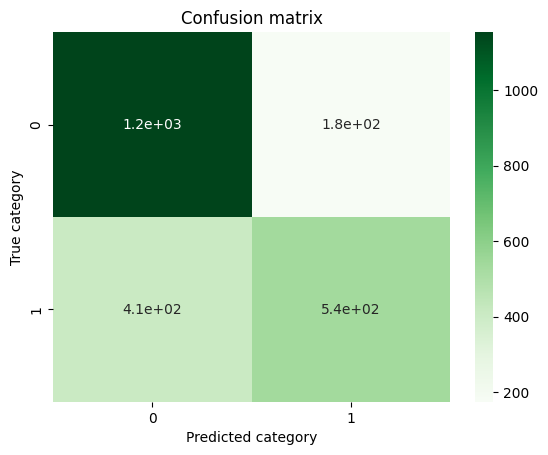

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1328
           1       0.75      0.57      0.65       948

    accuracy                           0.74      2276
   macro avg       0.75      0.72      0.72      2276
weighted avg       0.74      0.74      0.73      2276



In [27]:
matriz_confusion(y_test, y_pred)

SVC

In [28]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid_svc = {'C': [10000],'gamma': ['scale'], 'kernel': ['rbf'], 'degree':[3],'class_weight': ['balanced'], 'decision_function_shape': ['ovo'],   'probability': [True], 'coef0': [0.0], 'shrinking': [True], 'tol': [0.001], 'cache_size': [200], 'verbose': [False]}
# Crear y entrenar el modelo de Support Vector Classifier (SVC)
svc_model = SVC()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5)
grid_search_svc.fit(x_np, y_np)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros para SVC:", grid_search_svc.best_params_)

# Obtener el mejor modelo
best_svc_model = grid_search_svc.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_svc_model.predict(x_test_np)

# Evaluar el rendimiento del mejor modelo
print("Número de puntos mal clasificados de un total de %d puntos: %d" % (x_test_np.shape[0], (y_test != y_pred).sum()))

# Mostrar métricas de rendimiento del mejor modelo
print("Accuracy SVC: ", metrics.accuracy_score(y_test, y_pred))

metricas(y_test, y_pred)

Mejores hiperparámetros para SVC: {'C': 10000, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Número de puntos mal clasificados de un total de 2276 puntos: 437
Accuracy SVC:  0.8079964850615114
Accuracy:  0.8079964850615114
Precision:  0.7492682926829268
Recall:  0.810126582278481
F1-Score:  0.7785098834262544


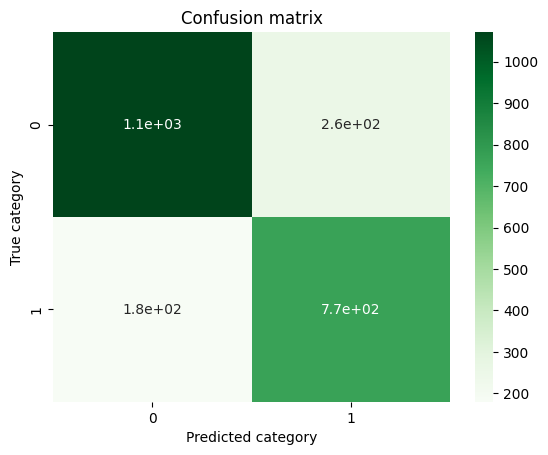

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1328
           1       0.75      0.81      0.78       948

    accuracy                           0.81      2276
   macro avg       0.80      0.81      0.80      2276
weighted avg       0.81      0.81      0.81      2276



In [29]:
matriz_confusion(y_test, y_pred)

Conclusiones de rendimiento:<br>
El algoritmo que mejores resultados ha aportado ha sido Random Forest con los siguientes valores:<br>
<ol>
<li>Accuracy:  0.8347978910369068</li>
<li>Precision:  0.8036093418259024</li>
<li>Recall:  0.7985232067510548</li>
<li>F1-Score:  0.801058201058201</li>
</ol>
<br>
El número de estimators con valor 500 es la opción más viable, ya que es el valor que proporciona la accuracy y precision más altos. 
Su comportamiento se asemeja a una campana de Gauss, 300 obtiene mejor resultado que 100, y 500 mejor que 300, en cambio 800 y 1200 obtienen peores resultados que sus anteriores.


<br>
Hemos podido concluir que en algunos casos se podrían poner valores mayores en algunos parámetros, como los parámetros C o gamma en el algoritmos SVC, obteniendo así mejores resultados en algunos casos (en otros como el parámetro n_es), pero con un coste computacional mucho mas elevado y un procesamiento bastante mas lento, por lo que hemos deidido buscar un punto medio entre mayor precisión y el tiempo de entrenamiento.